### IMPORTING REQUIRED LIBRARIES/MODULES

In [1]:
#Importing pandas for exploring and cleaning the dataset

import pandas as pd


#Importing the ML module, MLxtend, for association (in this case, using the FPGrowth Algorithm)

from mlxtend.frequent_patterns import fpgrowth as fpg, association_rules as AssRls

#Ignoring warnings about possible update issues 
    
import warnings
warnings.filterwarnings('ignore') 


#Library for displaying imported images

from IPython.display import display
from PIL import Image

### SUMMARY

### Scope 

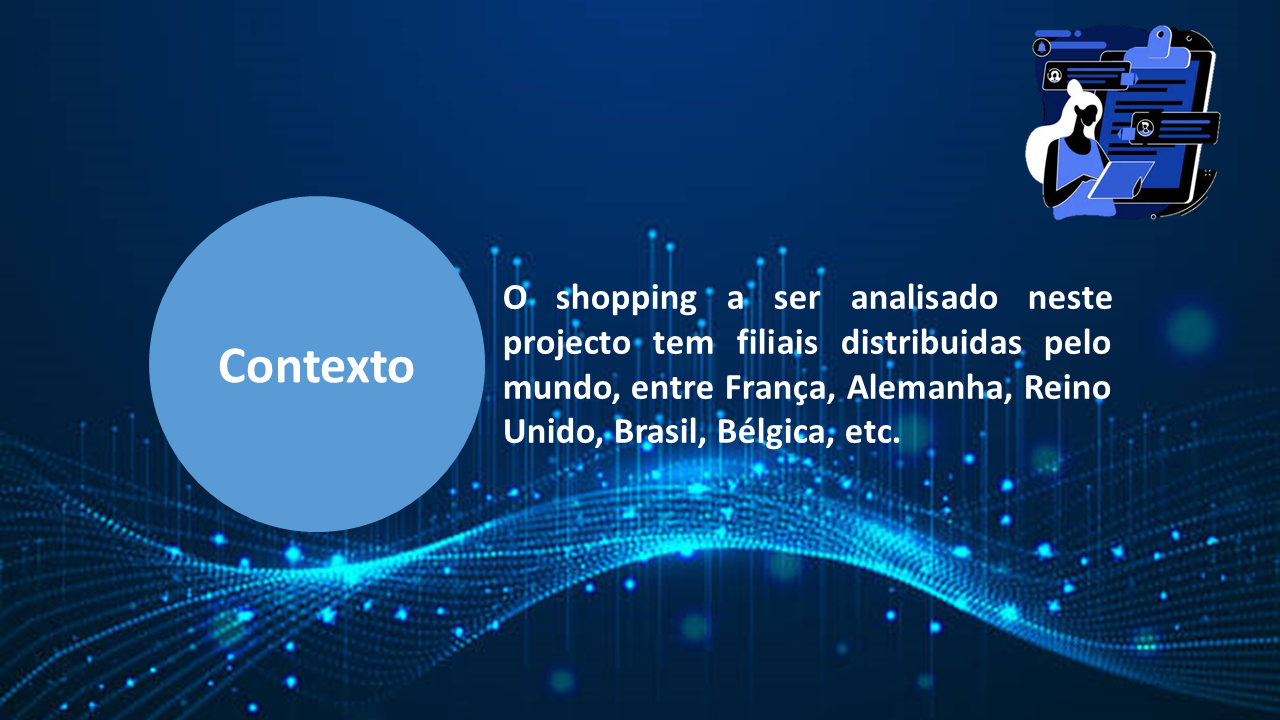

In [2]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall.scope.png"))

### Business Problem

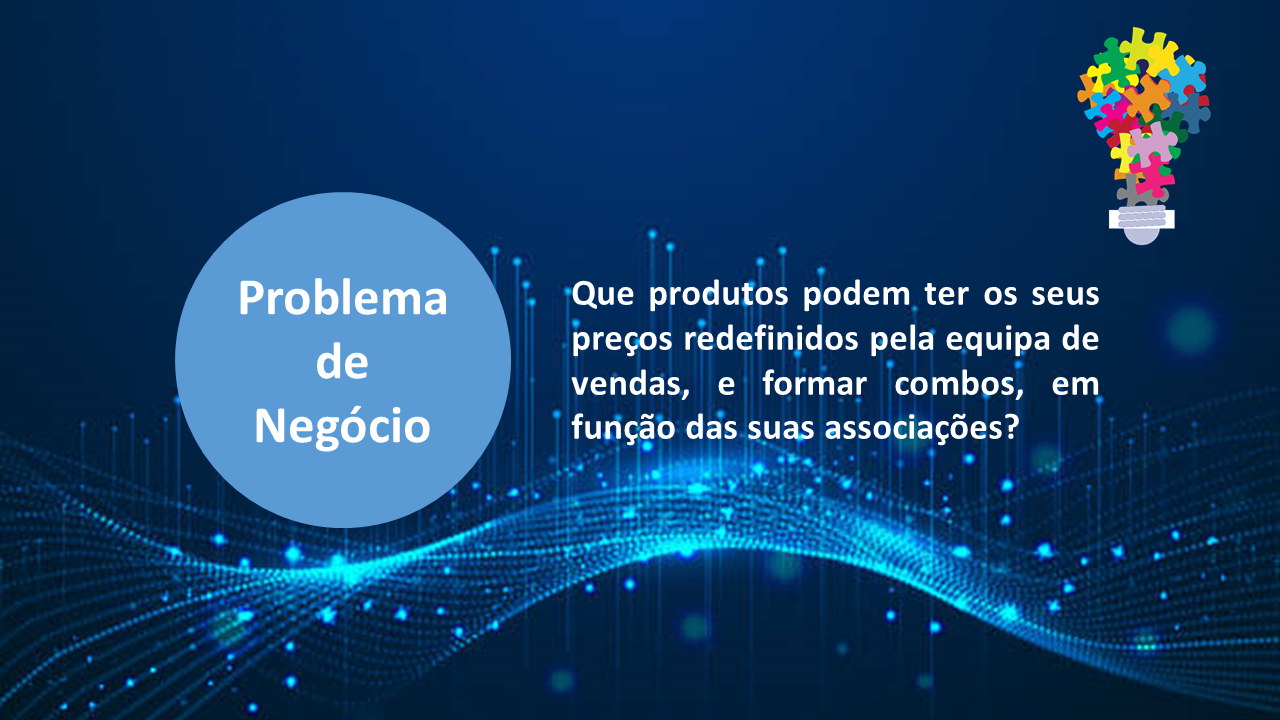

In [3]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall.businessproblem.png"))

### Goals

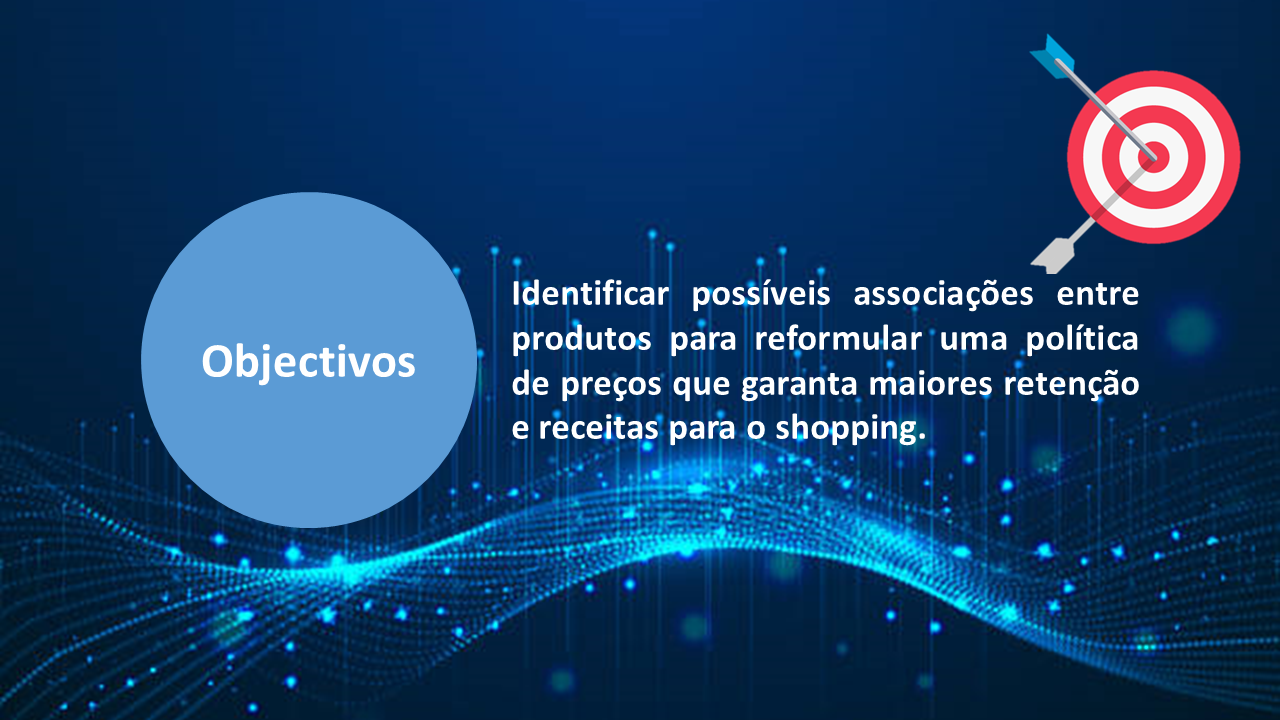

In [4]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall.goals.png"))

### Approach

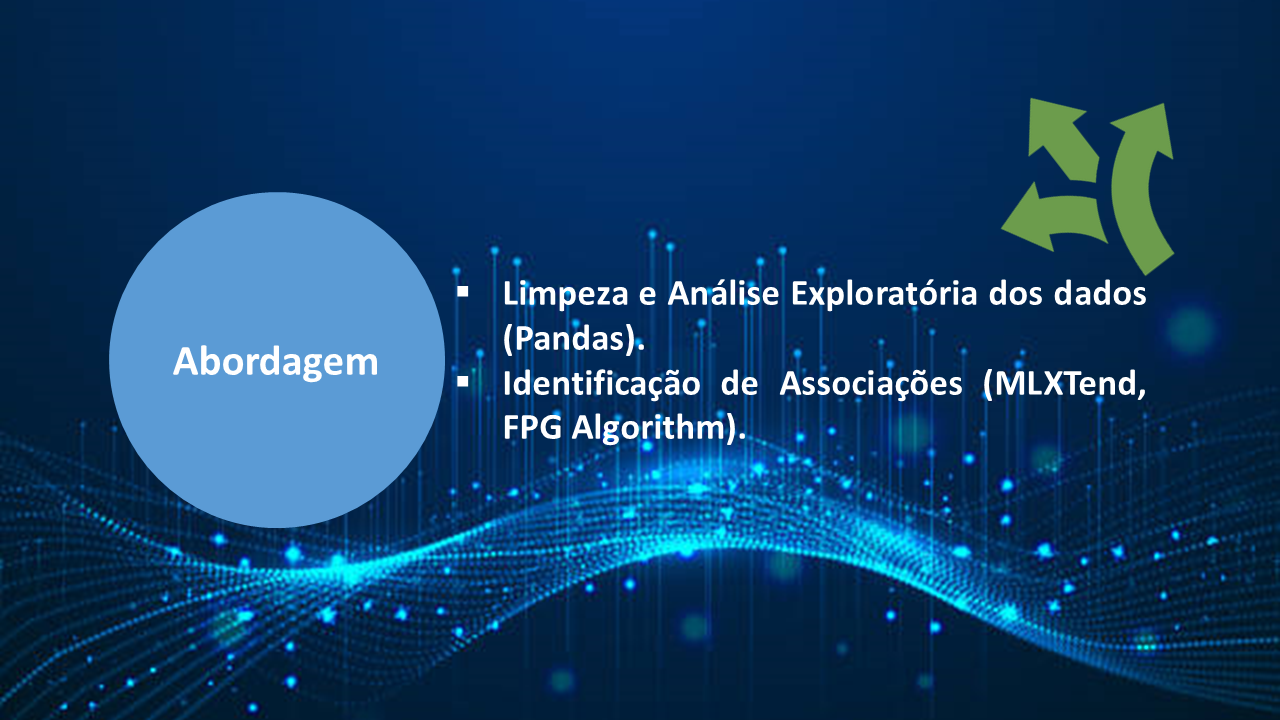

In [5]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall.approach.png"))

### Tools 

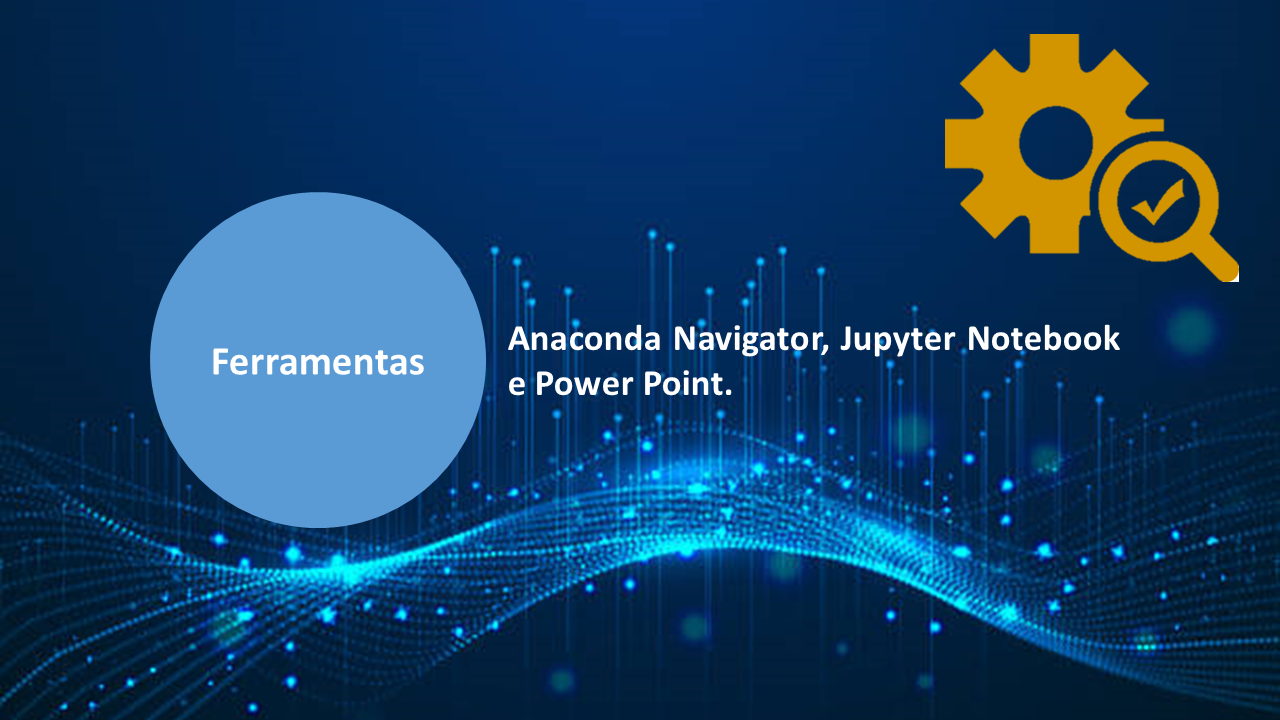

In [6]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall.tools.png"))

### EXPORATORY DATA ANALYSIS

In [7]:
# Importing the dataset

df_mall= pd.read_excel("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/MyMall_FPGrowth.xlsx")

In [8]:
df_mall.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
# Checking for missing values

df_mall.isnull().value_counts()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  CustomerID  Country
False      False      False        False     False        False      False       False      406829
                                                                     True        False      133626
                      True         False     False        False      True        False        1454
dtype: int64

In [10]:
# Displaying the first ten records 

df_mall.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# Displaying the last ten records 

df_mall.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
# Presenting the main statistics parameters

df_mall.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##### CLEANING THE DESCRIPTION COLUMN

In [13]:
# Checking for missing values

df_mall['Description'].isnull().value_counts()

False    540455
True       1454
Name: Description, dtype: int64

We have found some irregular values while exploring the dataset csv file as shown below:

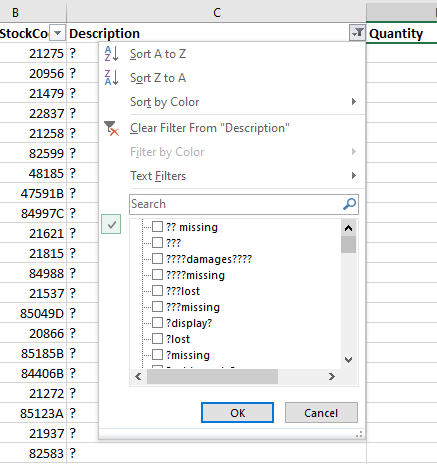

In [14]:
display(Image.open("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/irregularvalues.png"))

In [15]:
# To solve this problem, we'll strip this characters

df_mall['Description'] = df_mall['Description'].str.strip(',.$*%/-?_')

In [16]:
# Checking for null Descriptions

df_mall['Description'].isnull().value_counts()

False    540454
True       1455
Name: Description, dtype: int64

In [17]:
# Dropping all found missing Description

df_mall.dropna(axis = 0, subset =['Description'], inplace = True)

In [18]:
# Checking once again for missing Descriptions

df_mall['Description'].isnull().value_counts()

False    540454
Name: Description, dtype: int64

###### CLEANING THE INVOICE NUMBER COLUMN

In [19]:
# Converting the whole InvoiceNo to string

df_mall['InvoiceNo'] = df_mall['InvoiceNo'].astype('str')

In [20]:
# Checking for missing InvoiceNo records

df_mall['InvoiceNo'].isnull().value_counts()

False    540454
Name: InvoiceNo, dtype: int64

In [21]:
# Since we just want to recommend for those who have already paid, it's better to drop all transactions done on credit 'C'.
# Let us check first for payments on credit

df_mall = df_mall[~df_mall['InvoiceNo'].str.contains('C')]

In [22]:
# Droping columns that cantain payments on credit

df_mall = df_mall[~df_mall['InvoiceNo'].str.contains('C')]

In [23]:
# Checking again for any transaction done on credit

df_mall['InvoiceNo'].str.contains('C').value_counts()

False    531166
Name: InvoiceNo, dtype: int64

In [24]:
# Checking one more time for any null value in df_mall['InvoiceNo']

df_mall['InvoiceNo'].isnull().value_counts()

False    531166
Name: InvoiceNo, dtype: int64

#### Splitting the data by country

In [25]:
# We'll set the recommendation model according to each region. Let us choose just the top three countries with more InvoiceNo

df_mall.groupby(['Country'])['InvoiceNo'].count().reset_index(name='InvoiceNo').sort_values(by='InvoiceNo',ascending =False).head(3)

,Country,InvoiceNo
37,United Kingdom,486167
14,Germany,9042
13,France,8408


In [26]:
# Function to unstack the chosen country table and one hote encode their values

def unstack(chosencountry):
    
        
    DF=df_mall[df_mall['Country']==chosencountry].groupby(['InvoiceNo', 'Description'])['Description'].count().unstack().reset_index().set_index('InvoiceNo')       
   
    def one_hot_encoding(DF):
        if (DF!=1):
            return 0
        else:
            return 1  
        
                
    return DF.applymap(one_hot_encoding)

In [27]:
# Applying the function above we have:
 
    
# Association for products sold in UK

df_malluk=unstack('United Kingdom')


# Association for products sold in Germany

df_mallgr=unstack('Germany')


# Association for products sold in France

df_mallfr=unstack('France')



### BUILDING THE MODELS FOR EACH COUNTRY 

#### Association Model for United Kingdom

In [28]:
# Enabling the option for displaying the entire value in columns 

pd.set_option('display.max_colwidth', None)

In [29]:
# Displaying the U.K transactions dataset shape

df_malluk.shape

(18667, 4172)

In [30]:
# Setting the FPGrowth algorithm

assuk_items = fpg(df_malluk, min_support = 0.03, use_colnames = True)

It means we'll analyse association for groups of products bought in United Kingdom with a minimum representation of 3% over the total of transactions (sold 3 times in each 100 sales)

In [31]:
# Implementing and collecting the inferred rules in a  association dataframe

assuk = AssRls(assuk_items, metric ="lift", min_threshold = 5)
assuk_output = assuk.sort_values(['confidence', 'lift'], ascending =[False, False])
assuk_output

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037124,0.049124,0.030053,0.809524,16.479150,0.028229,4.992098,0.975533
8,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.049124,0.050517,0.036481,0.742639,14.700788,0.034000,3.689305,0.980124
9,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.050517,0.049124,0.036481,0.722163,14.700788,0.034000,3.422427,0.981562
1,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061017,0.102695,0.040767,0.668130,6.505989,0.034501,2.703785,0.901289
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049124,0.037124,0.030053,0.611778,16.479150,0.028229,2.480216,0.987844
2,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.059838,0.102695,0.036481,0.609669,5.936717,0.030336,2.298831,0.884483
4,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.059892,0.102695,0.034553,0.576923,5.617852,0.028402,2.120904,0.874363
6,(LUNCH BAG BLACK SKULL),(LUNCH BAG RED RETROSPOT),0.062624,0.073017,0.030107,0.480753,6.584162,0.025534,1.785245,0.904781
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL),0.073017,0.062624,0.030107,0.412326,6.584162,0.025534,1.595061,0.914925
0,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.102695,0.061017,0.040767,0.396974,6.505989,0.034501,1.557120,0.943152


From this 3% over the 18,667 transactions we've chosen to analyse the InvoiceNo with associations that may improve the sales by at least 5 times.

In [32]:
# Saving the U.K found associations as CSV file

assuk_output.to_csv("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/uk_foundcombos.csv")

##### Comments about U.K results

Looking to the lift parameter, index 2, we notice that there is practically 6 times more chances to buy "(JUMBO BAG RED RETROSPOT and JUMBO STORAGE BAG SUKI" together than only buying "JUMBO BAG RED RETROSPOT".

#### Association Model for Germany

In [33]:
# Displaying the Germany transactions dataset shape

df_mallgr.shape

(457, 1697)

In [34]:
# Setting the FPG algorithm for Germany transactions

assgr_items = fpg(df_mallgr, min_support = 0.1, use_colnames = True)

It means we'll analyse association for products bought in Germany with a minimum representation of 10% over the total of transactions (group of items sold 10 times in each 100 sales)

In [35]:
# Implementing and collecting the inferred rules in a  association dataframe

assgr = AssRls(assgr_items, metric ="lift", min_threshold = 3)
assgr_output = assgr.sort_values(['confidence', 'lift'], ascending =[False, False])
assgr_output

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.157549,0.242888,0.131291,0.833333,3.430931,0.093024,4.542670,0.841039
2,"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.150985,0.242888,0.124726,0.826087,3.401097,0.088054,4.353392,0.831525
4,(ROUND SNACK BOXES SET OF 4 FRUITS ),"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND )",0.157549,0.225383,0.124726,0.791667,3.512540,0.089218,3.718162,0.849077
3,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND )",(ROUND SNACK BOXES SET OF 4 FRUITS ),0.225383,0.157549,0.124726,0.553398,3.512540,0.089218,1.886357,0.923431
1,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.242888,0.157549,0.131291,0.540541,3.430931,0.093024,1.833569,0.935838
5,(ROUND SNACK BOXES SET OF4 WOODLAND ),"(ROUND SNACK BOXES SET OF 4 FRUITS , POSTAGE)",0.242888,0.150985,0.124726,0.513514,3.401097,0.088054,1.745198,0.932461


From this 10% (1697 items) over the 457 transactions we opted to analyse the InvoiceNo which associations may increase the sales by not less than 3 times.

In [36]:
# Saving the Germany found associations as CSV file

assgr_output.to_csv("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/gr_foundcombos.csv")

##### Comments about Germany results

Analysing the lift parameter, index 5, it's notable that there is approximately 3 times more chances of buying "ROUND SNACK BOXES SET OF4 WOODLAND, ROUND SNACK BOXES SET OF 4 FRUITS and POSTAGE" combo than only buying "ROUND SNACK BOXES SET OF4 WOODLAND". 

#### Association Model for France 

In [37]:
# Displaying the France transactions dataset shape

df_mallfr.shape

(392, 1564)

In [38]:
# Setting the FPG algorithm

assfr_items = fpg(df_mallfr, min_support = 0.1, use_colnames = True)

It means we'll analyse association for products bought in France with a minimum representation of 10% over the total of transactions, which is 392, sold 10 times in each 100 sales.

In [39]:
# Implementing and collecting the inferred rules in a  association dataframe

assfr = AssRls(assfr_items, metric ="lift", min_threshold = 5)
assfr_output = assfr.sort_values(['confidence', 'lift'], ascending =[False, False])
assfr_output

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
4,"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",(SET/6 RED SPOTTY PAPER CUPS),0.107143,0.137755,0.102041,0.952381,6.913580,0.087281,18.107143,0.958000
1,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
5,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",(SET/6 RED SPOTTY PAPER PLATES),0.117347,0.127551,0.102041,0.869565,6.817391,0.087073,6.688776,0.966763
6,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE)",0.127551,0.117347,0.102041,0.800000,6.817391,0.087073,4.413265,0.978070
3,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS ),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
2,(SET/20 RED RETROSPOT PAPER NAPKINS ),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.127551,0.102041,0.769231,6.030769,0.085121,3.780612,0.961765
8,(SET/20 RED RETROSPOT PAPER NAPKINS ),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.137755,0.102041,0.769231,5.584046,0.083767,3.736395,0.946471
7,(SET/6 RED SPOTTY PAPER CUPS),"(SET/6 RED SPOTTY PAPER PLATES, POSTAGE)",0.137755,0.107143,0.102041,0.740741,6.913580,0.087281,3.443878,0.992012
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS ),0.137755,0.132653,0.102041,0.740741,5.584046,0.083767,3.345481,0.952071


From this 10% over the total transactions, 1564, we have decided to analyse all InvoiceNo associations that may assure a growth in sales of at least 5 times to the mall.

In [40]:
# Saving the France found associations as CSV file

assfr_output.to_csv("C:/Users/domingosdeeularia/Projects/MyMall_FPGrowth/fr_foundcombos.csv")

##### Comments about France results

Analysing the lift parameter, index 4, it is remarkable that there is almost 7 times more chances  to buy "SET/6 RED SPOTTY PAPER PLATES, POSTAGE and SET/6 RED SPOTTY PAPER CUPS" together than only "SET/6 RED SPOTTY PAPER PLATES and POSTAGE". A combo for this products in France should be a good sales strategy.

### FINAL REMARKS 

The FPGrowth Algorithm has had a better performance than the Apriori (you can find my project about this algorithm on my MyMall_Apriori repository). It can be explained by the association approach of this method. While the Apriori algorithm, even finding the final associatinos still goes back and forth in the DB to check for any more possible co-occurrence, the FPG algorithm organizes the associations as a tree structure, making this task faster, and also, providing different results when using the same parameters scores defined in the Apriori algorithm.